In [1]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
%matplotlib inline

In [2]:
#import more packages (json)
import json
from pandas.io.json import json_normalize

In [3]:
# load file as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [4]:
#find the top ten most appeared countries and store it in count_country
count_country = df['countryshortname'].value_counts().head(10)

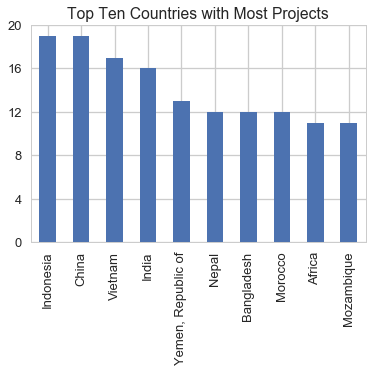

In [5]:
#bar plot the top 10 countries 
#Answer to question No.1 
count_country.plot(kind='bar')
plt.yticks((0, 4, 8, 12, 16, 20))
plt.title('Top Ten Countries with Most Projects')


In [6]:
#load file to json format
data_json = json.load((open('data/world_bank_projects.json')))

In [7]:
#normalize the 'mjtheme_namecode' column of the json file. store the data frame into df_theme
df_theme = json_normalize(data_json, 'mjtheme_namecode')
df_theme.head(5)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [15]:
#writing a dictionary to find the 'code' and 'name' pairs, initialize the dictionary here
map_dict={}

#loop over the rows in the dataframe
for index, row in df_theme.iterrows():
        if row[0] not in map_dict.keys() and row[1] is not '':
            map_dict[row[0]] = row[1]
            

In [16]:
#check the map
print(map_dict)

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [19]:
#use the pairing dictionary to map the 'code' column, write the results into the 'name' column
#Answer to question No.3 is here:
#######Is this what the question is? Do I need to denormalize the dataframe and put it back to the main df??????
df_theme['name'] = df_theme['code'].map(map_dict)

In [20]:
print(df_theme.head())

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration


In [21]:
#find the top 10 most appeared theme from the 'code' column
top_theme = df_theme['name'].value_counts().head(10)

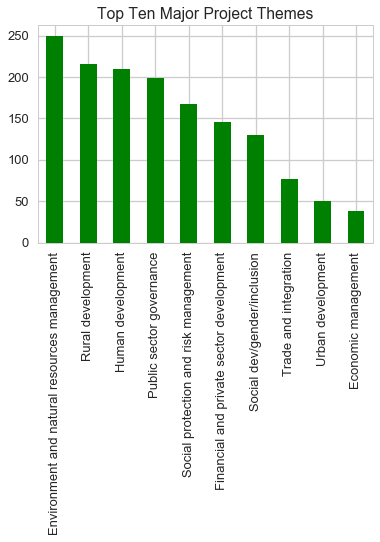

In [22]:
#plot the top 10 major porject themes
#Answer to question No.2 is there:
top_theme
top_theme.plot(kind='bar', color='green')
plt.title('Top Ten Major Project Themes')